In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import time

# Load data

In [2]:
path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\clean_labeled_climate_data_elev.pkl"
df = pd.read_pickle(path)
df.shape

(470320, 126)

In [3]:
points_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]), crs="EPSG:4326")

# Load and merge state data

In [4]:
url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip"
print("📥 Downloading U.S. Census Bureau state boundaries...")
us_states = gpd.read_file(url)

📥 Downloading U.S. Census Bureau state boundaries...


In [5]:
exclude = ['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS']  # Non-continental states/territories
us_states = us_states[~us_states["STUSPS"].isin(exclude)].copy()
us_states = us_states.to_crs(points_gdf.crs)
print(f"✅ Loaded contiguous U.S. states")

✅ Loaded contiguous U.S. states


In [6]:
print("⚡ Performing spatial join...")
joined = gpd.sjoin(points_gdf, us_states[['STUSPS', 'geometry']], how="left", predicate="within")

⚡ Performing spatial join...


In [7]:
df["state"] = joined["STUSPS"]

# Data validation

In [8]:
df.state.value_counts(dropna=False)

state
TX     37456
MT     25830
CA     23889
NM     17759
NV     17144
AZ     16631
OR     16242
CO     16214
WY     16134
MN     14624
ID     14080
UT     13173
SD     13046
KS     12850
ND     12592
NE     12342
WA     12003
MO     10746
OK     10345
MI      9758
WI      9490
IA      9166
IL      8883
GA      8416
NY      8001
AR      7761
FL      7544
AL      7430
NC      7275
PA      7168
MS      6811
LA      6532
OH      6515
TN      6323
KY      6134
VA      6010
IN      5687
ME      5544
SC      4466
WV      3760
VT      1621
NH      1548
MD      1499
MA      1286
NJ      1174
CT       791
DE       307
RI       175
NaN      134
DC        11
Name: count, dtype: int64

In [9]:
df.state.nunique()

49

<Axes: >

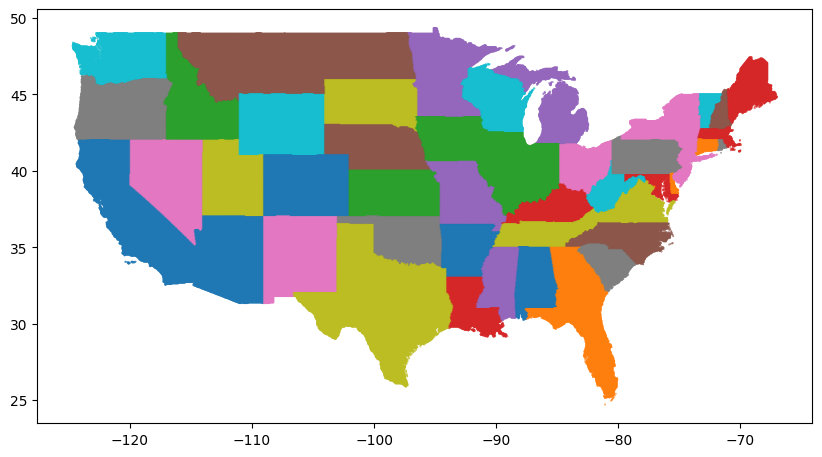

In [14]:
joined.plot(column='STUSPS', figsize=(10, 6), markersize=0.1, legend=False)

In [15]:
df.columns

Index(['longitude', 'latitude', 'jan_tmin', 'feb_tmin', 'mar_tmin', 'apr_tmin',
       'may_tmin', 'jun_tmin', 'jul_tmin', 'aug_tmin',
       ...
       'dec_vpdmin', 'annual_vpdmin', 'Level_1', 'Level_2', 'Level_3',
       'Level_4', 'ECO_NAME', 'climates_f', 'elevation', 'state'],
      dtype='object', length=127)

# Save 

In [16]:
out_path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\clean_labeled_climate_data_with_states.pkl"
df.to_pickle(out_path)
print(f"💾 Saved DataFrame with states to:\n   {out_path}")

💾 Saved DataFrame with states to:
   C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\clean_labeled_climate_data_with_states.pkl
